# 투빅스 18기 Week2 Regression 과제2 - 18기 이다인

### [과제 2] 회귀분석
#### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
#### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [39]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [40]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")

## 데이터 전처리

In [41]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [42]:
data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [43]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


* `Unnamed:0`은 의미 없는 column이므로 삭제할 필요가 있다
* `Mileage`, `Engine`, `Power`는 단위를 제거한 후 수치형 변수로 변환해 줄 필요가 있다.
* `New_Price`는 결측치가 70% 이상이므로 column 자체를 삭제하는 것이 옳다고 판단내렸다.
* `Mileage`, `Engine`, `Power`, `Seats` 변수는 결측치가 존재하지만 그 수가 10%미만이기 때문에 column 자체를 삭제하기 보다는 다른 방법을 통해 처리할 필요가 있다.
* `Name` 변수는 활용하기 어렵기에 `Brand`변수를 따로 생성하여 활용하는 것이 좋아보인다. 

In [45]:
# 'Unnamed: 0' column 삭제
data.drop('Unnamed: 0', inplace = True, axis=1)

In [46]:
# Mileage, Engine, Power 변수 단위 제거 후 수치형 변수로 변환
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")
data['Power'] = data['Power'].str.replace(" bhp","")

data['Power'] = data['Power'].replace(np.nan, None)
data['Power'] = data['Power'].replace('null', None)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

In [47]:
# 'New_Price' column 삭제
data.drop('New_Price', inplace = True, axis=1)

In [48]:
# 'Brand' 변수 생성
data['Brand'] = data.Name.str.split().str[0]
data.drop('Name', inplace = True, axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  Brand              6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


## 결측치 처리

<AxesSubplot:>

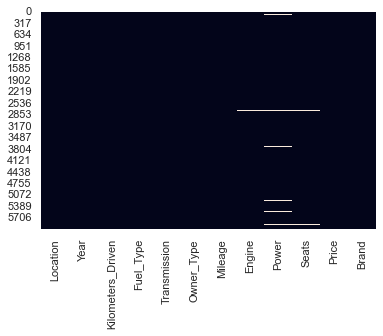

In [50]:
sns.heatmap(data.isnull(), cbar=False)

* 결측치를 시각화 해본결과 결측치 중 `Engine`, `Power`, `Seats` 변수 결측치에 상관관계가 있어보인다.
* `Engine`이 결측값일 시 `Seats`와`Power` 또한 결측치인 것을 확인할 수 있으며, `Seats`가 결측값일 경우 `Power`의 값이 결측값인 것을 확인할 수 있다.  따라서 engine이 결측치인 경우와 `Seats`가 결측치인 경우에 해당하는 행을 삭제해주었다.

In [51]:
data = data.dropna(subset=['Engine'], axis=0)
data = data.dropna(subset=['Seats'], axis=0)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5977 non-null   object 
 1   Year               5977 non-null   int64  
 2   Kilometers_Driven  5977 non-null   int64  
 3   Fuel_Type          5977 non-null   object 
 4   Transmission       5977 non-null   object 
 5   Owner_Type         5977 non-null   object 
 6   Mileage            5975 non-null   float64
 7   Engine             5977 non-null   float64
 8   Power              5874 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              5977 non-null   float64
 11  Brand              5977 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 607.0+ KB


* 남아있는 결측치들은 median 값으로 대체해주었다.

In [53]:
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())
data['Power'] = data['Power'].fillna(data['Power'].median())

In [54]:
print(data.isnull().sum())

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64


## 이상치 처리

In [55]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5977.000000,5.977000e+03,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,2013.386816,5.867041e+04,18.179401,1621.376945,112.989630,5.278735,9.502776
std,3.247017,9.154346e+04,4.521044,601.274926,53.455517,0.808840,11.204031
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.391500e+04,15.200000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,97.700000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.960000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


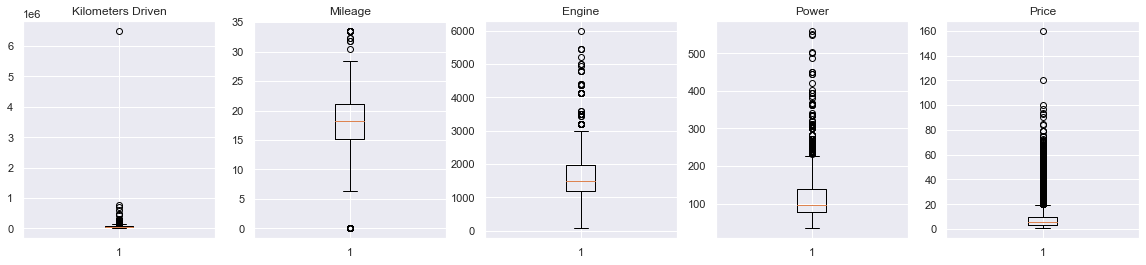

In [56]:
fig, ax = plt.subplots(1,5, figsize=(20,4))

ax[0].boxplot(data.Kilometers_Driven)
ax[0].set_title("Kilometers Driven")
ax[1].boxplot(data.Mileage)
ax[1].set_title("Mileage")
ax[2].boxplot(data.Engine)
ax[2].set_title("Engine")
ax[3].boxplot(data.Power)
ax[3].set_title("Power")
ax[4].boxplot(data.Price)
ax[4].set_title("Price")
plt.show()

* boxplot을 통해서 확인해 본 결과 `Kilometers Driven`와`Price`에서 다른 값들에 비해 너무 높은 값이 나온 것을 발견하였다.
* describe을 통해서 확인해본 결과 `Seats`와`Mileage`에 각각 min값이 0인 점들이 발견되었다.  
* 이상치로 의심되는 각각의 값들을 자세히 살펴보고자 한다.

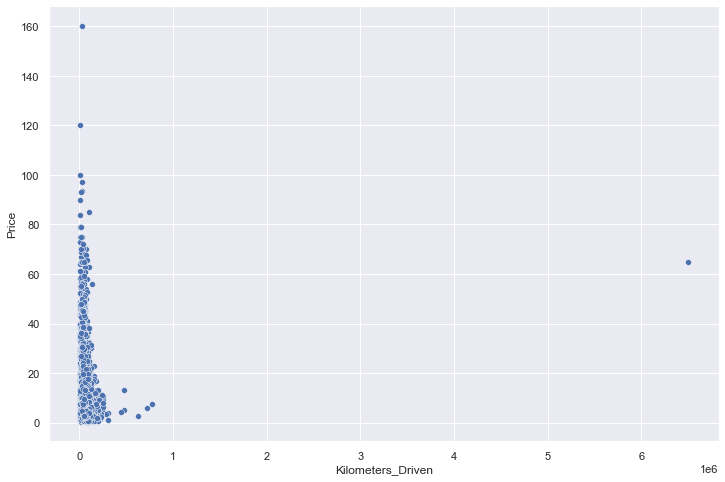

In [57]:
#Kilometers_Driven과 Price시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data.Kilometers_Driven, y=data.Price)
plt.show()

In [58]:
data[data["Kilometers_Driven"]>=6000000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,BMW


In [59]:
data[data["Price"]>=150]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,Land


* 중고차 시장에서 1년 평균 주행거리가 15,000km~25,000km인 것을 감안하면 2017년에 출시된 자동차의 주행거리가 6000000 km 이상이라는 것은 말이 안되는 수치라고 판단하여 해당열을 삭제해주었다.
* Price 가 다른 값에 비해 월등히 높은 'Land Rover' 자동차의 경우 원래 가격이 높은 차량이기 때문에 해당열은 따로 삭제하지 않았다.

In [60]:
data = data.drop([2328], axis=0)

In [61]:
data[data["Seats"]==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0,Audi


* 자동차가 0인승이라는 것은 있을 수 없으므로 `Seats`가 0인 열도 삭제해주었다. 

In [62]:
data = data.drop([3999], axis=0)

In [25]:
data[data['Mileage']==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
14,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,17.50,Land
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,35.67,Mercedes-Benz
79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,97.70,5.0,1.30,Hyundai
262,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086.0,97.70,5.0,1.75,Hyundai
307,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086.0,97.70,5.0,1.50,Hyundai
424,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,97.70,5.0,5.45,Volkswagen
443,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,97.70,5.0,3.35,Hyundai
544,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,38.99,Mercedes-Benz
631,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,97.70,5.0,0.65,Hyundai
647,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,97.70,5.0,0.80,Hyundai


* 'Mileage'이 0인 값들이 많이 존재 하므로 삭제하는 것은 옳지 않다고 판단하여 삭제하지 않고 진행하였다.

## Target distribution 

<AxesSubplot:xlabel='Price', ylabel='Count'>

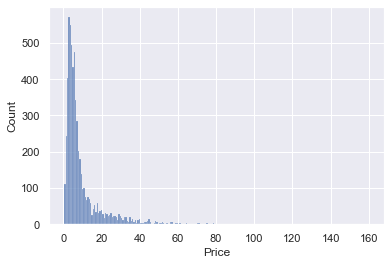

In [63]:
sns.histplot(data=data['Price'])

* target 분포가 skewed 되어 있기 때문에 log Transformation을 해주어야 한다.

In [64]:
data['log_Price'] = np.log(data['Price'])

<AxesSubplot:xlabel='log_Price', ylabel='Count'>

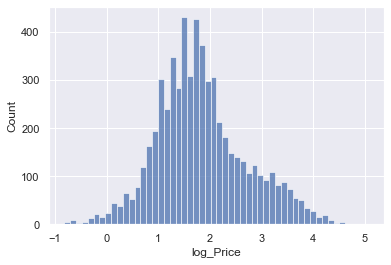

In [65]:
sns.histplot(data=data['log_Price'])

* log transformation 후 정규분포화 된 것을 확인할 수 있다.

## 수치형 변수 Scaling

* 선형회귀나 로지스틱 회귀의 경우 입력의 스케일에 크게 영향을 받기 때문에 수치형 변수의 scaling을 진행해주어야 한다.
* 따라서 어떤 scaling을 진행할 지 확인하기 위해 그래프를 시각화 하였다.

<AxesSubplot:xlabel='Year', ylabel='Count'>

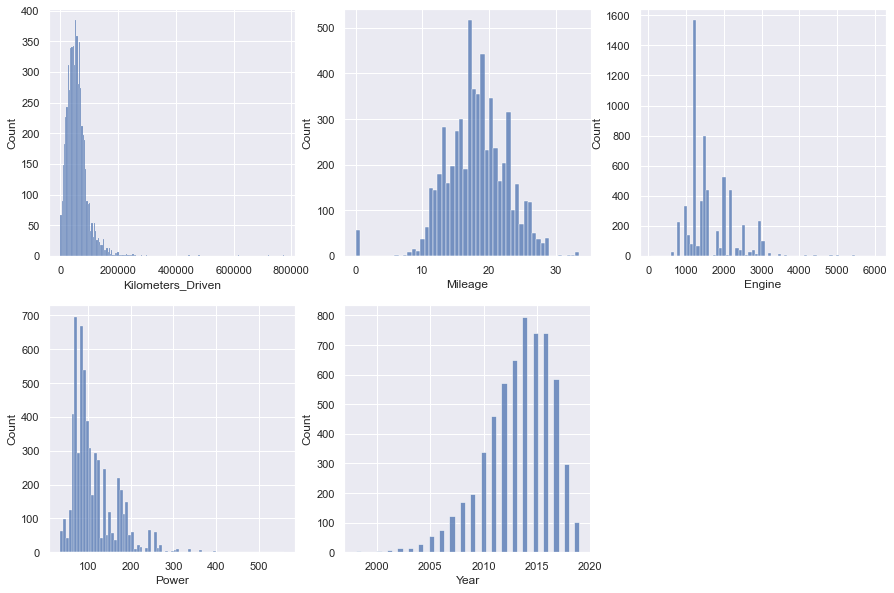

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
sns.histplot(data=data['Kilometers_Driven'])
plt.subplot(2, 3, 2)
sns.histplot(data=data['Mileage'])
plt.subplot(2, 3, 3)
sns.histplot(data=data['Engine'])
plt.subplot(2, 3, 4)
sns.histplot(data=data['Power'])
plt.subplot(2, 3, 5)
sns.histplot(data=data['Year'])

* `Kilometers_Driven`, `Engine`, `Power` 의 경우 왼쪽으로 skewed되어있고, `Year`의 경우 비교적 정규분포에 가깝지만 아주 약간 오른쪽으로 skewed되어 있다.
* 그래프의 단위를 보면 변수들의 단위 차이로 인해 숫자의 스케일이 크게 다른 것을 확인할 수 있다.
* log 변환과 standardscale 둘 다 사용하기에 적합한 데이터라고 판단하였고, 이번 과제에서는 StandardScaler를 활용한 표준화를 선택하여 진행해주었다.

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

num_col = ['Year', 'Kilometers_Driven','Mileage','Engine','Power','Seats']
numeric_data = []
numeric_data = pd.DataFrame(data,columns=['Year', 'Kilometers_Driven','Mileage','Engine','Power','Seats'])

ss.fit(numeric_data)
numeric_data_scaled = ss.transform(numeric_data)
numeric_data_scaled = pd.DataFrame(numeric_data_scaled, columns=num_col)

data = data.drop(num_col, axis=1)
data = pd.concat([numeric_data_scaled, data], axis=1)
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location,Fuel_Type,Transmission,Owner_Type,Price,Brand,log_Price
0,-1.042977,0.380545,1.862499,-1.036900,-1.025853,-0.346975,Mumbai,CNG,Manual,First,1.75,Maruti,0.559616
1,0.496953,-0.437619,0.329395,-0.064729,0.247668,-0.346975,Pune,Diesel,Manual,First,12.50,Hyundai,2.525729
2,-0.734991,-0.305657,0.004191,-0.702300,-0.454228,-0.346975,Chennai,Petrol,Manual,First,4.50,Honda,1.504077
3,-0.427005,0.776431,0.572745,-0.620731,-0.453105,2.134382,Chennai,Diesel,Manual,First,6.00,Maruti,1.791759
4,-0.119019,-0.446329,-0.659491,0.577836,0.520940,-0.346975,Coimbatore,Diesel,Automatic,Second,17.74,Audi,2.875822


*  변수들 간의 값의 범위가 표준화 된 것을 볼 수 있다.

## 범주형 변수 dummy

In [31]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel_Type', drop_first=True)
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission', drop_first=True)
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner_Type', drop_first=True)
Brand_dummy = pd.get_dummies(data['Brand'], prefix='Brand', drop_first=True)

data = pd.concat([data,Fuel_dummy,Transmission_dummy,Owner_dummy,Brand_dummy],axis=1)
data = data.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand','Location'], axis=1)

In [76]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,log_Price,Fuel_Type_Diesel,Fuel_Type_Electric,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0.559616,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,2.525729,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,1.504077,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1.791759,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,2.875822,1,0,...,0,0,0,0,0,0,0,0,0,0


## 변수들 간의 상관관계  

<AxesSubplot:>

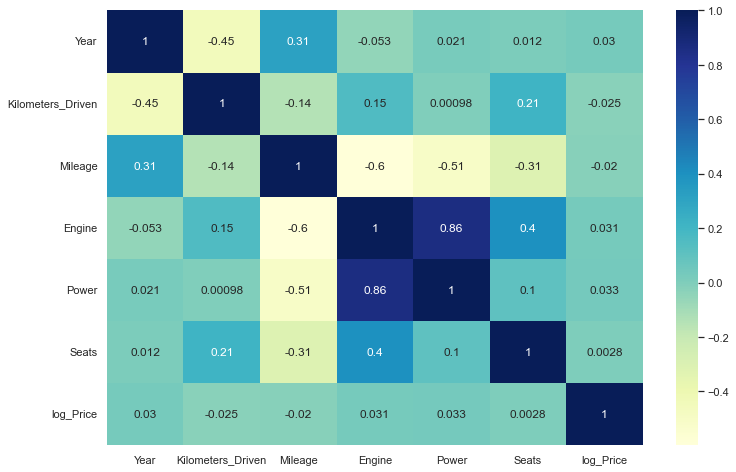

In [32]:
num = ['Year', 'Kilometers_Driven','Mileage','Engine','Power','Seats','log_Price']
data_num = data[num].corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data=data_num, annot=True, cmap='YlGnBu')

* log_Price와 상관관계가 매우 약해보이는 변수는 없으므로 모두 회귀분석에 사용될 수 있다. (회귀분석 기본 가정 검토인 선형성 검토)
* `Engine` 변수와 `Power` 변수간의 상관관계가 높다는 것을 알 수 있다. 이는 다중공선성의 위험이 있기 때문에 VIF를 통해 따로 검토해 볼 필요성이 있다고 판단하였다.

In [69]:
# VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

num = ['Year', 'Mileage','Engine','Power','Seats']
X = data[num]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,115.892005,Year
4,72.312154,Seats
2,54.603781,Engine
3,29.055188,Power
1,27.313101,Mileage


* 시행 결과 VIF 점수가 10이 넘는 변수가 없으므로, 다중공선성 문제는 없다고 판단하였다.

## train / test set 나누기

In [71]:
X = data.drop(['log_Price'], axis=1)
y = data["log_Price"]

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. OLS

* 이번 과제에서는 4가지의 회귀모델을 사용하여 데이터에 가장 적합한 모델을 찾아볼것이다.

### 1.Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [74]:
#모델 적용
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)

In [75]:
# R-squared값과 MSE값 출력
print(f'R-squared_train: {model1.score(X_train, y_train)}')
print(f'MSE_train: {mean_squared_error(y_train, pred_train)}')
print(f'R-squared_test: {model1.score(X_test, y_test)}')
print(f'MSE_test: {mean_squared_error(y_test, pred_test)}')

R-squared_train: 0.9285008870718056
MSE_train: 0.054251651241378235
R-squared_test: 0.9231825803619382
MSE_test: 0.058753831413839164


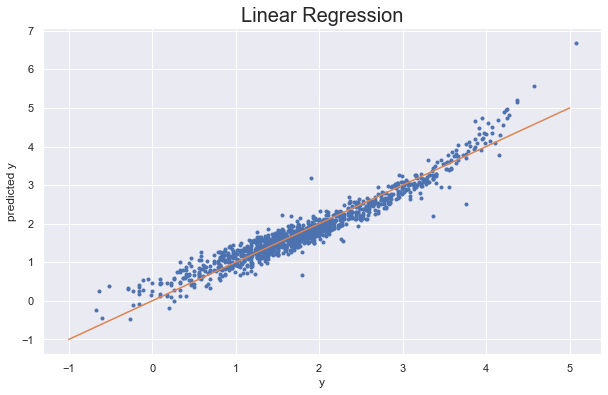

In [94]:
# 예측 vs 실제 데이터 plot
plt.figure(figsize=(10,6))
plt.plot(y_test, model1.predict(X_test), '.')
x = np.linspace(-1, 5, 100)
y = x
plt.xlabel('y')
plt.ylabel('predicted y')
plt.title('Linear Regression', fontsize=20)
plt.plot(x, y)
plt.show()

* R-squared값이 높고 MSE값이 낮은 걸로 보아 모델의 설명력이 높다고 볼 수 있다. 
* 또한 그래프도 라인상에 점들이 대부분 분포하는 것으로 보아 Linear Regression 결과가 타당하다고 볼 수 있다.

### 2.Ridge Regression

In [77]:
from sklearn.linear_model import Ridge

In [99]:
#모델 적용
model2 = Ridge(alpha=0.01)
model2.fit(X_train, y_train)
pred_train2 = model2.predict(X_train)
pred_test2 = model2.predict(X_test)

In [100]:
# R-squared값과 MSE값 출력
print(f'R-squared_train: {model2.score(X_train, y_train)}')
print(f'MSE_train: {mean_squared_error(y_train, pred_train2)}')
print(f'R-squared_test: {model2.score(X_test, y_test)}')
print(f'MSE_test: {mean_squared_error(y_test, pred_test2)}')

R-squared_train: 0.9285008192220973
MSE_train: 0.05425170272395692
R-squared_test: 0.9231857087952677
MSE_test: 0.058751438630466606


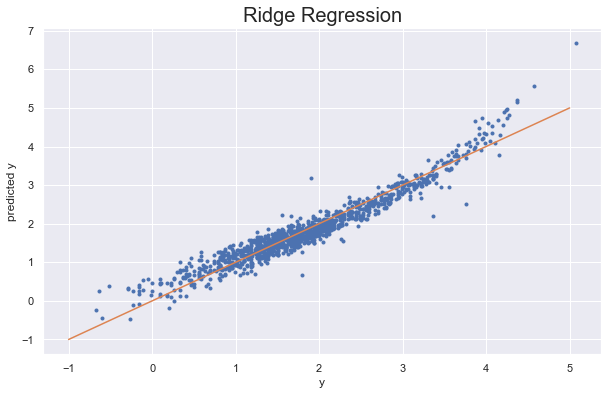

In [101]:
# 예측 vs 실제 데이터 plot
plt.figure(figsize=(10,6))
plt.plot(y_test, model2.predict(X_test), '.')
x = np.linspace(-1, 5, 100)
y = x
plt.xlabel('y')
plt.ylabel('predicted y')
plt.title('Ridge Regression', fontsize=20)
plt.plot(x, y)
plt.show()

* Linear Regression비해 조금 낮기는 하지만 그래도 R-squared값이 높고 MSE값이 낮은 걸로 보아 모델의 설명력이 높다고 볼 수 있다. 
* 그래프도 라인상에 점들이 꽤 분포하는 것으로 보아 Ridge Regression 결과가 타당하다고 볼 수 있다.

### 3.Lasso Regression

In [102]:
from sklearn.linear_model import Lasso

In [103]:
#모델 적용
model3 = Lasso(alpha=0.01)
model3.fit(X_train, y_train)
pred_train3 = model3.predict(X_train)
pred_test3 = model3.predict(X_test)

In [104]:
# R-squared값과 MSE값 출력
print(f'R-squared_train: {model3.score(X_train, y_train)}')
print(f'MSE_train: {mean_squared_error(y_train, pred_train3)}')
print(f'R-squared_test: {model3.score(X_test, y_test)}')
print(f'MSE_test: {mean_squared_error(y_test, pred_test3)}')

R-squared_train: 0.9039580896925954
MSE_train: 0.07287408205729495
R-squared_test: 0.8910534764240757
MSE_test: 0.08332778827332679


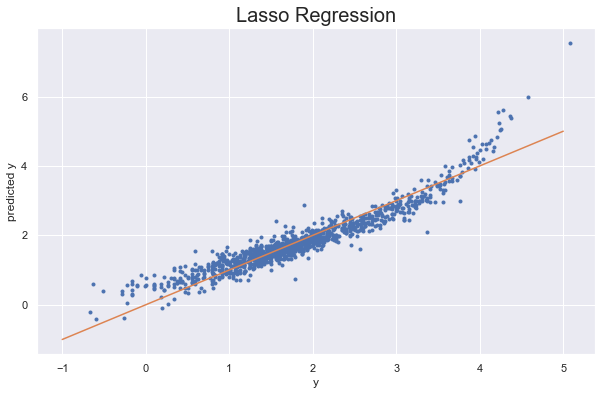

In [105]:
# 예측 vs 실제 데이터 plot
plt.figure(figsize=(10,6))
plt.plot(y_test, model3.predict(X_test), '.')
x = np.linspace(-1, 5, 100)
y = x
plt.xlabel('y')
plt.ylabel('predicted y')
plt.title('Lasso Regression', fontsize=20)
plt.plot(x, y)
plt.show()

* Linear Regression과 Ridge Regression에 비해 낮지만 그래도 R-squared값이 깨 높고 MSE값이 낮은 걸로 보아 모델의 설명력이 높다고 볼 수 있다. 
* 그래프도 라인상에 점들이 꽤 분포하는 것으로 보아 Lasso Regression 결과가 타당하다고 볼 수 있다.

### 4.OLS

In [83]:
import statsmodels.api as sm

In [84]:
#모델 적용
model4 = sm.OLS(y, X)
result = model4.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_Price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4654.
Date:                Sat, 30 Jul 2022   Prob (F-statistic):                        0.00
Time:                        01:44:51   Log-Likelihood:                         -1963.7
No. Observations:                5975   AIC:                                      4017.
Df Residuals:                    5930   BIC:                                      4319.
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

* R-squared 값과 Adj.R-squared 값이 둘 다 0.972로 모델의 설명력이 높은 것을 알 수 있다.
* Durbon-Watson 값이 2에 가까우므로 오차의 독립성을 만족한다고 볼 수 있다.

## 회귀분석 가정 검토

* 4가지 모델을 사용해본 결과 Linear Regrssion 을 사용했을 때 R-squared 점수가 가장 높은 것을 확인하였다. 따라서 회귀분석 가정 검토에서는 Linear Regression을 사용했을 때의 오차를 통해 검토해보려고 한다.
* 설명변수와 반응변수 간에 선형성과 오차의 독립성은 위에서 이미 확인되었기 때문에 추가적으로 검증하지 않았다.

### 1. 오차의 정규성 확인

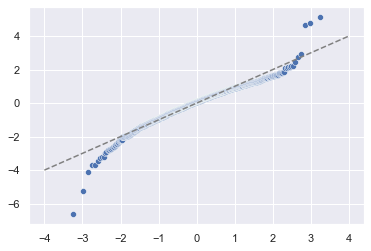

In [107]:
import scipy.stats

residual = y_test - pred_test
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x, y)
plt.plot([-4, 4], [-4, 4], '--', color='grey')

* 확률오차가 정규성을 만족하는 편이라는 것을 알 수 있다.

### 2.오차의 등분산성 확인

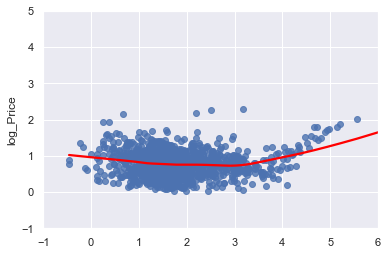

In [118]:
sns.regplot(pred_test, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.xlim(-1,6)
plt.ylim(-1,5)
plt.show()

* 빨간선이 거의 일직선의 형태를 띠고, 자료가 어느 정도 고르게 분포하고 있는 것으로 보아 완벽한 형태는 아니더라도 어느 정도 등분산성을 만족한다고 볼 수 있다.